In [1]:
import pandas as pd
import glob
import os


result_df_with_segment = pd.read_csv("data/성과정보_with_segment.csv")
result_df_with_segment

,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,Segment
0,201807,TRAIN_000000,0.454548,0.454548,0.364727,1.999996,0.0,0.000000,0.0,0.409766,...,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280543,D
1,201807,TRAIN_000001,-0.511808,-0.511808,-0.511808,0.000000,0.0,0.000000,0.0,-1.010817,...,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000,E
2,201807,TRAIN_000002,-0.062716,-0.062716,0.067843,-1.999996,0.0,0.000000,0.0,-0.902166,...,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420,C
3,201807,TRAIN_000003,0.135707,0.135707,0.153975,-1.999996,0.0,0.000000,0.0,-0.866052,...,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124,D
4,201807,TRAIN_000004,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000028,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0.000000,0.000000,0.000000,0.000000,0.0,-0.081943,0.0,0.000027,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E
2399996,201812,TRAIN_399996,0.073804,0.073804,0.073804,0.000000,0.0,0.000000,0.0,0.207099,...,0.999998,0.999998,0.999998,0.921733,-0.203251,-0.159143,0.000000,1.377071,2.533815,D
2399997,201812,TRAIN_399997,-0.040432,-0.040432,-0.040432,0.000000,0.0,0.000000,0.0,0.254495,...,0.345027,0.999998,0.999998,0.999998,0.027319,0.126581,0.000000,0.000000,0.000000,C
2399998,201812,TRAIN_399998,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000034,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E


## 변동률 관련 컬럼

In [4]:
# '변동률_이용건수'로 시작하는 컬럼만 추출
change_money_cols = [col for col in result_df_with_segment.columns if col.startswith("변동률")]

# 결과 확인
print("📌 변동률 관련 컬럼:")
for col in change_money_cols:
    print(col)

📌 변동률 관련 컬럼:
변동률_일시불평잔
변동률_RV일시불평잔
변동률_할부평잔
변동률_CA평잔
변동률_RVCA평잔
변동률_카드론평잔
변동률_잔액_B1M
변동률_잔액_일시불_B1M
변동률_잔액_CA_B1M


In [8]:
cols = [
    "변동률_일시불평잔", "변동률_RV일시불평잔", "변동률_할부평잔", "변동률_CA평잔", "변동률_RVCA평잔",
    "변동률_카드론평잔", "변동률_잔액_B1M", "변동률_잔액_일시불_B1M", "변동률_잔액_CA_B1M"
]

In [10]:
# 도수 분포 확인
def show_value_distributions(df, cols):
    distributions = {}
    for col in cols:
        distributions[col] = df[col].value_counts().sort_index()
    return distributions

In [12]:
# 세그먼트 별 평균 비교 함수
def show_segment_means(df, cols):
    return df.groupby('Segment')[cols].mean()


In [14]:
# 히스토그램 및 박스플롯 함수
def plot_histograms_and_boxplots(df, cols):
    for col in cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f'📊 {col} 히스토그램')
        sns.boxplot(x='Segment', y=col, data=df, ax=axes[1])
        axes[1].set_title(f'📦 {col} 박스플롯 (Segment별)')
        plt.tight_layout()
        plt.show()


In [16]:
# 더미 세그먼트와의 상관 히트맵 함수
def plot_segment_correlation_heatmap(df, cols):
    df_encoded = df.copy()
    segment_dummies = pd.get_dummies(df_encoded['Segment'], prefix='Segment')
    df_encoded = pd.concat([df_encoded, segment_dummies], axis=1)
    corr_cols = cols + list(segment_dummies.columns)
    corr = df_encoded[corr_cols].corr()
    segment_corr = corr.loc[cols, segment_dummies.columns]
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(segment_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1)
    plt.title("🔍 변동률 관련 컬럼 ↔ 세그먼트(더미) 상관계수 히트맵")
    plt.tight_layout()
    plt.show()

In [18]:
show_value_distributions(result_df_with_segment, cols)

{'변동률_일시불평잔': 변동률_일시불평잔
 0.000000    220197
 0.000480         1
 0.000518         1
 0.000725         1
 0.001088         1
              ...  
 2.061992         1
 2.062230         1
 2.062337         1
 2.062345         1
 2.062496       679
 Name: count, Length: 1812197, dtype: int64,
 '변동률_RV일시불평잔': 변동률_RV일시불평잔
 0.000000    129782
 0.643241         1
 0.655825         1
 0.667308         1
 0.677433         1
              ...  
 1.508872         1
 1.516078         1
 1.520375         1
 1.532217         1
 1.540538         1
 Name: count, Length: 392231, dtype: int64,
 '변동률_할부평잔': 변동률_할부평잔
 0.000000    275094
 0.083906         1
 0.087504         1
 0.087528         1
 0.088229         1
              ...  
 1.997102         1
 1.997141         1
 1.997240         1
 1.997359         1
 1.997502         1
 Name: count, Length: 852382, dtype: int64,
 '변동률_CA평잔': 변동률_CA평잔
 0.000000    196460
 0.312179         1
 0.320512         1
 0.321618         1
 0.321965         1
           

In [20]:
show_segment_means(result_df_with_segment, cols)

,변동률_일시불평잔,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M
Segment,,,,,,,,,
A,0.930912,1.002269,0.920529,0.977746,0.999966,0.994454,-0.047325,-0.007230,-0.013129
B,0.939222,1.011517,0.964580,0.988420,0.999998,0.917696,-0.006460,0.040312,-0.008916
C,0.946812,1.001592,0.904314,0.958459,0.998588,0.976035,-0.007943,0.008436,-0.006527
D,0.939715,1.001391,0.887476,0.962183,0.997581,0.979225,-0.007907,0.003712,-0.004978
E,0.887152,0.936445,0.872796,0.924030,0.935601,0.928666,-0.010577,0.002761,-0.002806


In [24]:
# 결측치 시각화를 위한 라이브러리
import missingno

# 그래프 기본 import
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

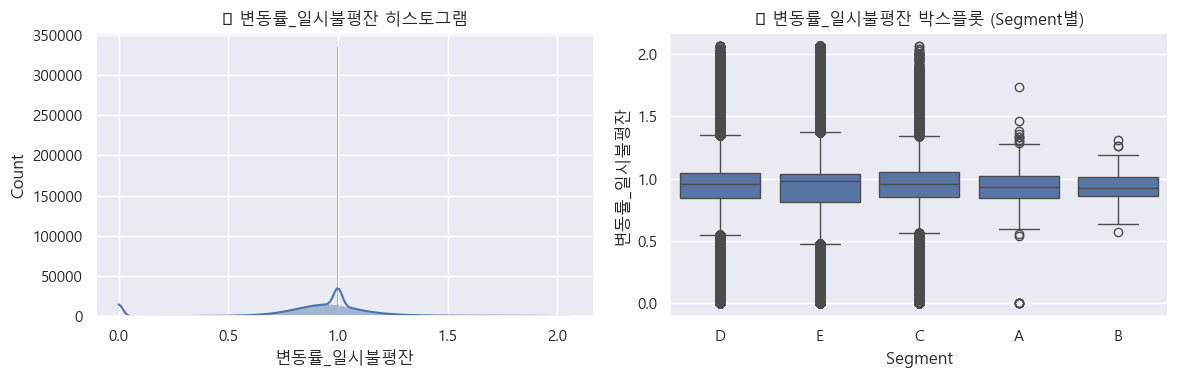

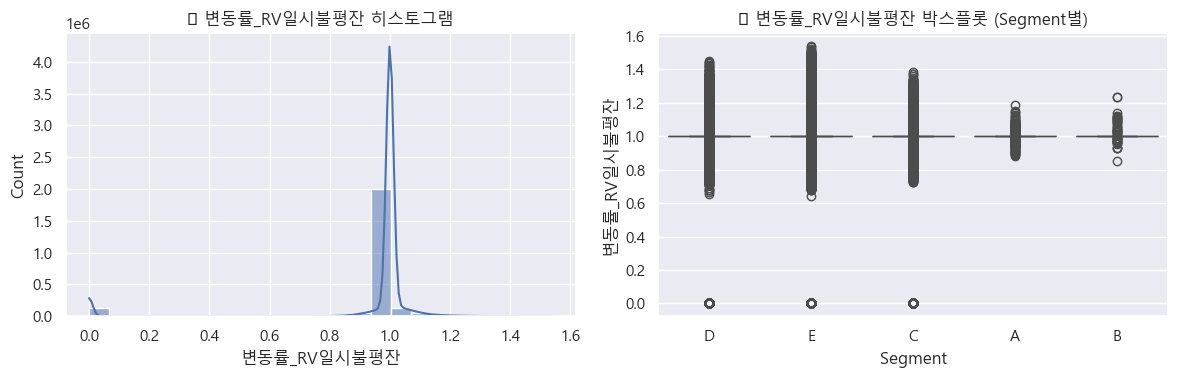

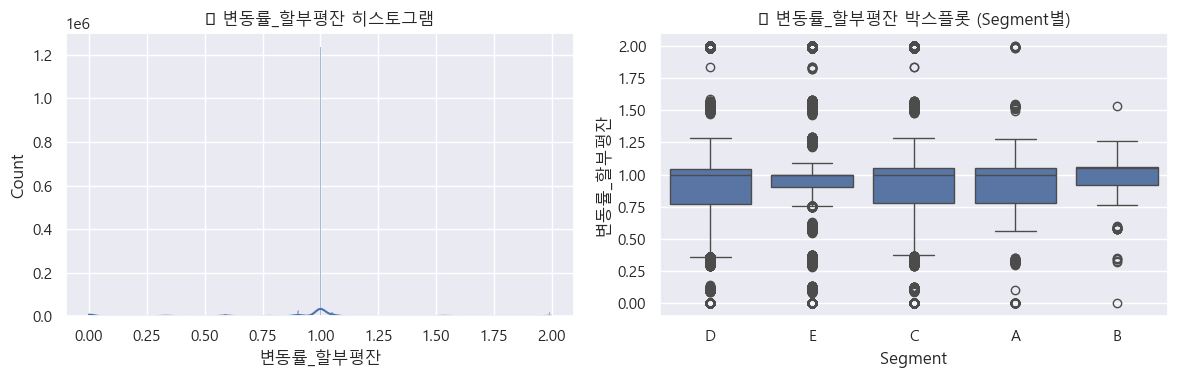

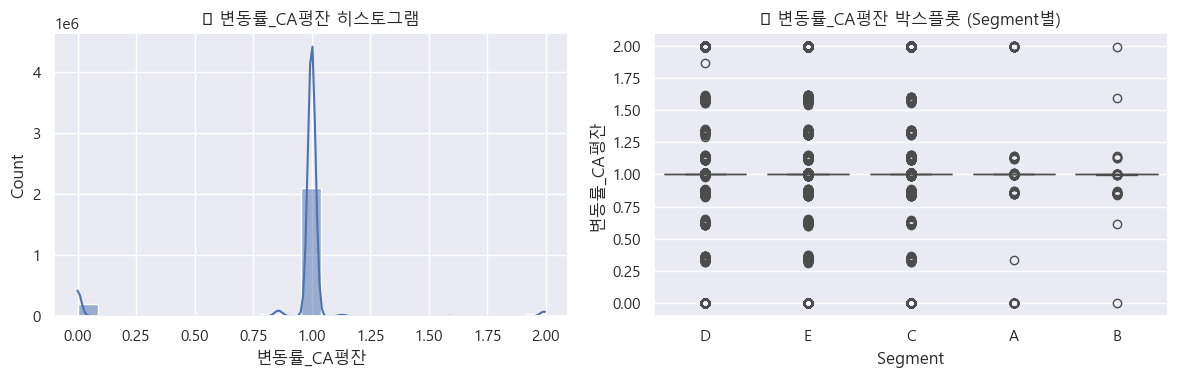

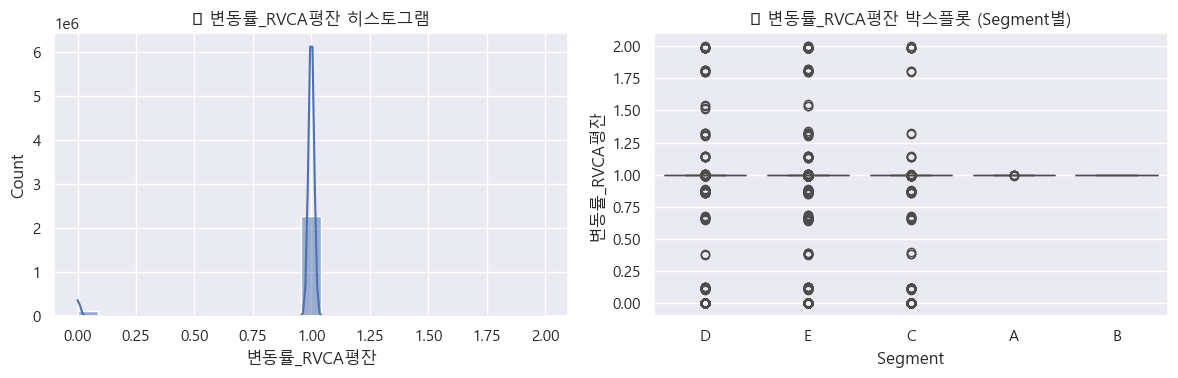

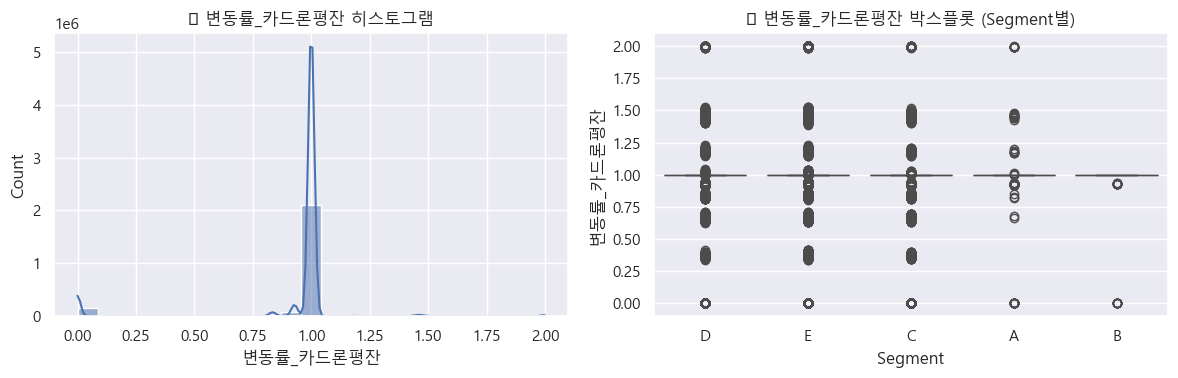

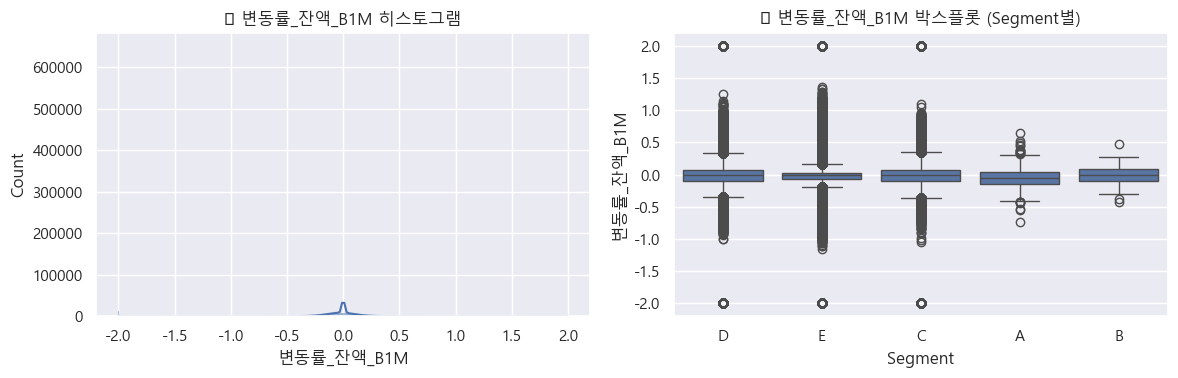

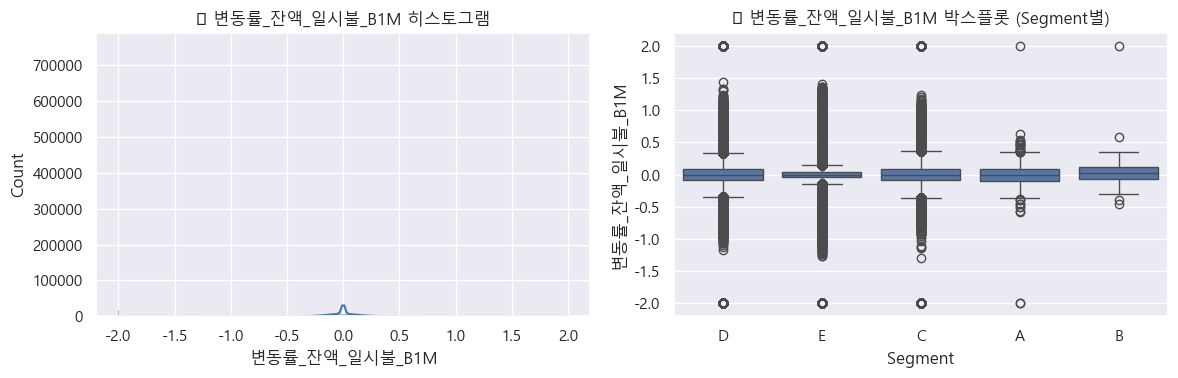

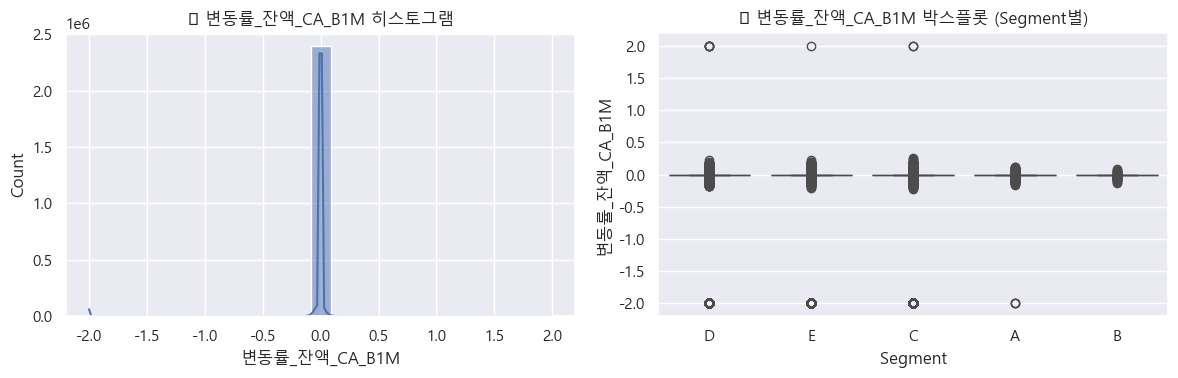

In [26]:
plot_histograms_and_boxplots(result_df_with_segment, cols)

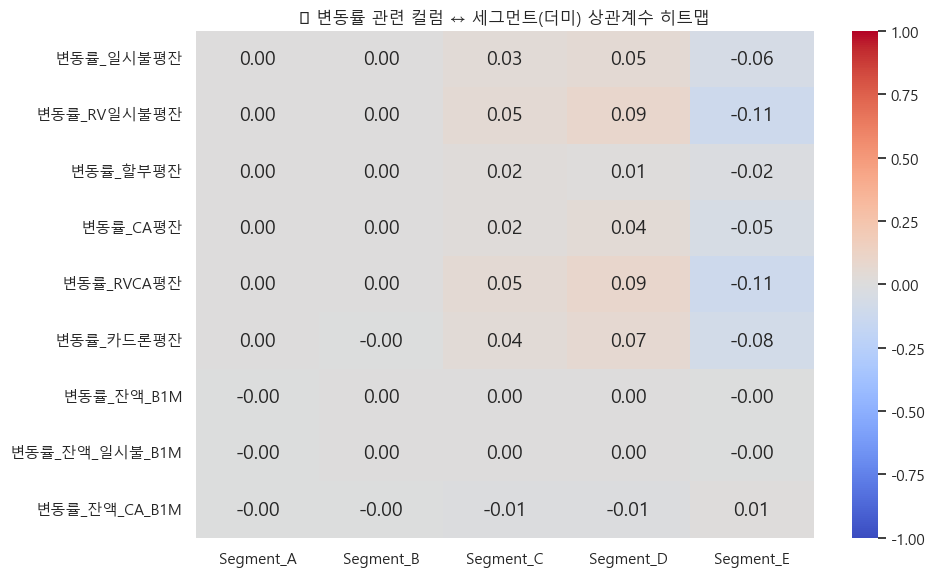

In [28]:
plot_segment_correlation_heatmap(result_df_with_segment, cols)

## 📊 변동률 관련 지표에 대한 세그먼트별 해석

### ✅ 1. 세그먼트 평균 비교 요약
| 세그먼트 | 일시불평잔 | RV일시불평잔 | 할부평잔 | CA평잔 | RVCA평잔 | 카드론평잔 | 잔액_B1M | 잔액_일시불_B1M | 잔액_CA_B1M |
|----------|-------------|---------------|-----------|-----------|-------------|--------------|-----------|-------------------|----------------|
| A        | 0.93        | 1.00          | 0.92      | 0.98      | 1.00         | 0.99         | -0.047    | -0.007            | -0.013         |
| B        | 0.94        | 1.01          | 0.96      | 0.99      | 1.00         | 0.92         | -0.006    | 0.040             | -0.009         |
| C        | 0.95        | 1.00          | 0.90      | 0.96      | 0.99         | 0.98         | -0.008    | 0.008             | -0.007         |
| D        | 0.94        | 1.00          | 0.89      | 0.96      | 1.00         | 0.98         | -0.008    | 0.004             | -0.005         |
| E        | 0.89        | 0.94          | 0.87      | 0.92      | 0.94         | 0.93         | -0.011    | 0.003             | -0.003         |

- 대부분의 **평균값은 0.9 이상으로 유지**되며, 큰 차이는 없지만 일부 컬럼에서는 Segment E가 다소 낮게 나타남.
- 특히, `변동률_RV일시불평잔`, `변동률_RVCA평잔`은 Segment B에서 평균값이 가장 높고, Segment E에서 가장 낮음.
- `변동률_잔액_B1M`은 Segment A에서 상대적으로 음의 값이 크며, 다른 세그먼트와는 대비됨.

---

### ✅ 2. 히트맵 상관계수 요약
- 전반적으로 **모든 상관계수가 낮으며**, 대부분 0.1 이하로, 세그먼트(더미)와의 뚜렷한 선형적 상관은 없음.
- 단, **`변동률_RV일시불평잔`, `변동률_RVCA평잔`이 Segment C, D와 약한 양의 상관 (0.09)**.
- 반대로 **Segment E는 일부 컬럼과 약한 음의 상관 (예: -0.11)**을 보임.

---

### 🔍 종합 해석
- 평균적으로는 세그먼트 B와 C가 높은 경향을 보이나, **전체적으로 큰 변별력은 부족**해 보임.
- 다만 `변동률_RV일시불평잔`, `변동률_RVCA평잔`, `변동률_카드론평잔` 등은 약간의 경향성을 띠므로, **모델링 단계에서 변수 선택에 있어 보조 지표로 고려할 수 있음**.
- 히트맵 결과만으로는 제거 대상이라고 판단하기엔 무리가 있으며, **다른 변수와의 조합 효과를 함께 검토**해야 함.


## 혜택 관련 변수